In [ ]:
%cd /content/drive/MyDrive/CS 7389G

/content/drive/MyDrive/CS 7389G


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf

In [ ]:
df1_adm=pd.read_csv("admissions.csv")
df1_adm

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431226,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,P75BG6,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2149-01-08 09:11:00,2149-01-08 18:12:00,0
431227,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,P16C7J,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2147-07-17 17:18:00,2147-07-18 17:34:00,0
431228,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,P58A9J,EMERGENCY ROOM,DIED,Other,ENGLISH,WIDOWED,WHITE,2164-09-10 11:09:00,2164-09-10 14:46:00,1
431229,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,NaN,EW EMER.,P506DE,EMERGENCY ROOM,HOME,Other,ENGLISH,WIDOWED,WHITE,2164-07-24 21:16:00,2164-07-25 01:20:00,0


In [ ]:
df1_adm=df1_adm.drop(columns=['admit_provider_id', 'edregtime', 'edouttime', 'hospital_expire_flag'])

In [ ]:
df_drg=pd.read_csv('drgcodes.csv')
df_drg=df_drg.iloc[:, :4]
df_drg

,subject_id,hadm_id,drg_type,drg_code
0,10000032,22595853,APR,283
1,10000032,22595853,HCFA,442
2,10000032,22841357,APR,279
3,10000032,22841357,HCFA,442
4,10000032,25742920,APR,283
...,...,...,...,...
604372,19999840,21033226,HCFA,100
604373,19999840,26071774,APR,45
604374,19999840,26071774,HCFA,65
604375,19999987,23865745,APR,44


In [ ]:
df_merged_1 = df1_adm.merge(df_drg, how='outer')

In [ ]:
df2_icu=pd.read_csv("icustays.csv")
df2_icu

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),7/23/2180 14:00,7/23/2180 23:50
1,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),6/27/2189 8:42,6/27/2189 20:38
2,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),11/20/2157 19:18,11/21/2157 22:08
3,10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),12/19/2157 15:42,12/20/2157 14:27
4,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),4/11/2110 15:52,4/12/2110 23:59
...,...,...,...,...,...,...,...
73176,19999442,26785317,32336619,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),11/19/2148 14:23,11/26/2148 13:12
73177,19999625,25304202,31070865,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),10/10/2139 19:18,10/11/2139 18:21
73178,19999828,25744818,36075953,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),1/8/2149 18:12,1/10/2149 13:11
73179,19999840,21033226,38978960,Trauma SICU (TSICU),Surgical Intensive Care Unit (SICU),9/12/2164 9:26,9/17/2164 16:35


In [ ]:
df_merged = df_merged_1.merge(df2_icu, how='outer')

In [ ]:
df3_serv=pd.read_csv('services.csv')
df3_serv

,subject_id,hadm_id,transfertime,prev_service,curr_service
0,10000032,22595853,5/6/2180 22:24,NaN,MED
1,10000032,22841357,6/26/2180 18:28,NaN,MED
2,10000032,25742920,8/5/2180 23:44,NaN,MED
3,10000032,29079034,7/23/2180 12:36,NaN,MED
4,10000068,25022803,3/3/2160 23:17,NaN,MED
...,...,...,...,...,...
468024,19999828,29734428,7/18/2147 16:24,NaN,SURG
468025,19999840,21033226,9/10/2164 13:49,NaN,NMED
468026,19999840,21033226,9/14/2164 10:40,NMED,MED
468027,19999840,26071774,7/25/2164 0:27,NaN,NMED


In [ ]:
df3_serv=df3_serv.drop(columns=['transfertime','prev_service'], axis=1)

In [ ]:
df_merged_2 = df_merged.merge(df3_serv, how='outer')

In [ ]:
df4_patient=pd.read_csv("patients.csv")
df4_patient

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,9/9/2180
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2/13/2161
4,10000102,F,27,2136,2008 - 2010,NaN
...,...,...,...,...,...,...
299707,19999828,F,46,2147,2017 - 2019,NaN
299708,19999829,F,28,2186,2008 - 2010,NaN
299709,19999840,M,58,2164,2008 - 2010,9/17/2164
299710,19999914,F,49,2158,2017 - 2019,NaN


In [ ]:
df4_patient=df4_patient.drop(columns=['anchor_year', 'dod'], axis=1)

In [ ]:
df_merged_3 = df_merged_2.merge(df4_patient, how='outer')

In [ ]:
df5_omr=pd.read_csv('omr.csv')
df5_omr

,subject_id,chartdate,seq_num,result_name,result_value
0,10000032,4/27/2180,1,Blood Pressure,110/65
1,10000032,4/27/2180,1,Weight (Lbs),94
2,10000032,5/7/2180,1,BMI (kg/m2),18
3,10000032,5/7/2180,1,Height (Inches),60
4,10000032,5/7/2180,1,Weight (Lbs),92.15
...,...,...,...,...,...
1048570,11654378,11/19/2203,1,Blood Pressure,144/105
1048571,11654378,11/19/2203,1,BMI (kg/m2),33.9
1048572,11654378,11/19/2203,1,Weight (Lbs),191.5
1048573,11654378,11/24/2203,1,Blood Pressure,142/97


In [ ]:
df5_omr=df5_omr.drop(columns=['chartdate','seq_num'], axis=1)

In [ ]:
df5_omr_2=df5_omr[(df5_omr['result_name']=='Weight (Lbs)') | (df5_omr['result_name']=='BMI (kg/m2)')]
df5_omr_2['result_value'] = df5_omr_2['result_value'].astype(float)

<ipython-input-17-6104f16abdca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_omr_2['result_value'] = df5_omr_2['result_value'].astype(float)


In [ ]:
averages = df5_omr_2.groupby(['result_name', 'subject_id'])['result_value'].mean()
averages_df = averages.reset_index()
averages_pivot = averages_df.pivot(index='subject_id', columns='result_name', values='result_value')
averages_pivot.reset_index(inplace=True)

In [ ]:
averages_pivot=averages_pivot[(averages_pivot['BMI (kg/m2)']<=100) & (averages_pivot['Weight (Lbs)']<=300)]
averages_pivot

result_name,subject_id,BMI (kg/m2),Weight (Lbs)
0,10000032,18.537500,93.104000
1,10000084,24.400000,170.000000
2,10000117,18.548000,111.129643
3,10000248,25.500000,168.000000
6,10000635,33.985714,215.871429
...,...,...,...
24613,11654285,36.989362,243.544043
24614,11654293,28.333333,150.000000
24615,11654306,41.933333,286.733333
24617,11654368,20.800000,115.400000


In [ ]:
df_merged_4=df_merged_3.merge(averages_pivot, how='outer')
df_merged_4

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,...,first_careunit,last_careunit,intime,outtime,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs)
0,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.5375,93.104
1,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.5375,93.104
2,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.5375,93.104
3,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.5375,93.104
4,10000032,25742920.0,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.5375,93.104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935006,19999659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,F,58,2011 - 2013,NaN,NaN
935007,19999750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,M,45,2017 - 2019,NaN,NaN
935008,19999782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,F,22,2008 - 2010,NaN,NaN
935009,19999829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,F,28,2008 - 2010,NaN,NaN


In [ ]:
df_merged_final=df_merged_4.dropna(subset=['hadm_id', 'Weight (Lbs)'])
df_merged_final

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,...,first_careunit,last_careunit,intime,outtime,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs)
0,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000
1,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000
2,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000
3,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000
4,10000032,25742920.0,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134122,11654378,28760789.0,2203-01-13 04:23:00,2203-01-18 13:00:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicare,ENGLISH,...,NaN,NaN,NaN,NaN,SURG,F,46,2008 - 2010,32.460377,184.133962
134123,11654378,29542546.0,2201-03-29 07:15:00,2201-03-29 20:45:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME,Medicare,ENGLISH,...,NaN,NaN,NaN,NaN,ORTHO,F,46,2008 - 2010,32.460377,184.133962
134124,11654378,29542546.0,2201-03-29 07:15:00,2201-03-29 20:45:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME,Medicare,ENGLISH,...,NaN,NaN,NaN,NaN,ORTHO,F,46,2008 - 2010,32.460377,184.133962
134125,11654378,29893525.0,2199-09-13 21:57:00,2199-09-15 16:45:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicare,ENGLISH,...,NaN,NaN,NaN,NaN,NSURG,F,46,2008 - 2010,32.460377,184.133962


In [ ]:
df_merged_final=df_merged_final[df_merged_final['deathtime'].isna()]

In [ ]:
lst=df_merged_final.index

In [ ]:
df_merged_final['Inpatient_Flow']=np.zeros(len(df_merged_final))
for i in lst:
  if pd.isna(df_merged_final['intime'][i])==True:
    df_merged_final['Inpatient_Flow'][i]=0
  else:
    df_merged_final['Inpatient_Flow'][i]=1

<ipython-input-24-2a1251d3bd49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_final['Inpatient_Flow']=np.zeros(len(df_merged_final))
<ipython-input-24-2a1251d3bd49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_final['Inpatient_Flow'][i]=0
<ipython-input-24-2a1251d3bd49>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_final['Inpatient_Flow'][i

In [ ]:
df_merged_final['Inpatient_Flow']=df_merged_final['Inpatient_Flow'].astype(int)

<ipython-input-25-eebca451209e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_final['Inpatient_Flow']=df_merged_final['Inpatient_Flow'].astype(int)


In [ ]:
df_merged_final=df_merged_final.drop(columns=['deathtime','stay_id','intime', 'outtime', 'language'])

In [ ]:
df_merged_final

,subject_id,hadm_id,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,marital_status,race,...,drg_code,first_careunit,last_careunit,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs),Inpatient_Flow
0,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,WHITE,...,283.0,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000,0
1,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,WHITE,...,442.0,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000,0
2,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,WIDOWED,WHITE,...,279.0,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000,0
3,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,WIDOWED,WHITE,...,442.0,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000,0
4,10000032,25742920.0,2180-08-05 23:44:00,2180-08-07 17:50:00,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,WIDOWED,WHITE,...,283.0,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134122,11654378,28760789.0,2203-01-13 04:23:00,2203-01-18 13:00:00,EW EMER.,EMERGENCY ROOM,HOME,Medicare,DIVORCED,WHITE,...,392.0,NaN,NaN,SURG,F,46,2008 - 2010,32.460377,184.133962,0
134123,11654378,29542546.0,2201-03-29 07:15:00,2201-03-29 20:45:00,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME,Medicare,DIVORCED,WHITE,...,310.0,NaN,NaN,ORTHO,F,46,2008 - 2010,32.460377,184.133962,0
134124,11654378,29542546.0,2201-03-29 07:15:00,2201-03-29 20:45:00,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME,Medicare,DIVORCED,WHITE,...,479.0,NaN,NaN,ORTHO,F,46,2008 - 2010,32.460377,184.133962,0
134125,11654378,29893525.0,2199-09-13 21:57:00,2199-09-15 16:45:00,URGENT,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicare,DIVORCED,WHITE,...,347.0,NaN,NaN,NSURG,F,46,2008 - 2010,32.460377,184.133962,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_merged_final['admission_type'] = labelencoder.fit_transform(df_merged_final['admission_type'])
df_merged_final['admission_location'] = labelencoder.fit_transform(df_merged_final['admission_location'])
df_merged_final['discharge_location'] = labelencoder.fit_transform(df_merged_final['discharge_location'])
df_merged_final['insurance'] = labelencoder.fit_transform(df_merged_final['insurance'])
df_merged_final['marital_status'] = labelencoder.fit_transform(df_merged_final['marital_status'])
df_merged_final['race'] = labelencoder.fit_transform(df_merged_final['race'])
df_merged_final['curr_service'] = labelencoder.fit_transform(df_merged_final['curr_service'])
df_merged_final['gender'] = labelencoder.fit_transform(df_merged_final['gender'])
df_merged_final['anchor_year_group'] = labelencoder.fit_transform(df_merged_final['anchor_year_group'])
df_merged_final['first_careunit']= labelencoder.fit_transform(df_merged_final['first_careunit'])
df_merged_final['last_careunit']= labelencoder.fit_transform(df_merged_final['last_careunit'])
df_merged_final['drg_type']= labelencoder.fit_transform(df_merged_final['drg_type'])
df_merged_final

,subject_id,hadm_id,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,marital_status,race,...,drg_code,first_careunit,last_careunit,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs),Inpatient_Flow
0,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,8,8,6,2,3,28,...,283.0,9,9,7,0,52,2,18.537500,93.104000,0
1,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,8,8,6,2,3,28,...,442.0,9,9,7,0,52,2,18.537500,93.104000,0
2,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,5,2,6,0,3,28,...,279.0,9,9,7,0,52,2,18.537500,93.104000,0
3,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,5,2,6,0,3,28,...,442.0,9,9,7,0,52,2,18.537500,93.104000,0
4,10000032,25742920.0,2180-08-05 23:44:00,2180-08-07 17:50:00,5,2,8,0,3,28,...,283.0,9,9,7,0,52,2,18.537500,93.104000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134122,11654378,28760789.0,2203-01-13 04:23:00,2203-01-18 13:00:00,5,2,6,1,0,28,...,392.0,9,9,15,0,46,0,32.460377,184.133962,0
134123,11654378,29542546.0,2201-03-29 07:15:00,2201-03-29 20:45:00,7,6,6,1,0,28,...,310.0,9,9,12,0,46,0,32.460377,184.133962,0
134124,11654378,29542546.0,2201-03-29 07:15:00,2201-03-29 20:45:00,7,6,6,1,0,28,...,479.0,9,9,12,0,46,0,32.460377,184.133962,0
134125,11654378,29893525.0,2199-09-13 21:57:00,2199-09-15 16:45:00,8,8,7,1,0,28,...,347.0,9,9,9,0,46,0,32.460377,184.133962,0


In [ ]:
from datetime import datetime
after_icu_begin=[datetime.strptime(value, "%Y-%m-%d %H:%M:%S") for value in df_merged_final['admittime']]
after_icu_begin
after_icu_end=[datetime.strptime(value, "%Y-%m-%d %H:%M:%S") for value in df_merged_final['dischtime']]
after_icu_end
los = []
for item1, item2 in zip(after_icu_end, after_icu_begin):
    duration = item1- item2
    duration_in_s = duration.total_seconds()
    los.append(duration_in_s/86400.00)
#after_icu_end=[datetime.fromisoformat(df_merged_icu['dischtime'][i]).timestamp() for i in range(0,len(df_merged_icu),1)]

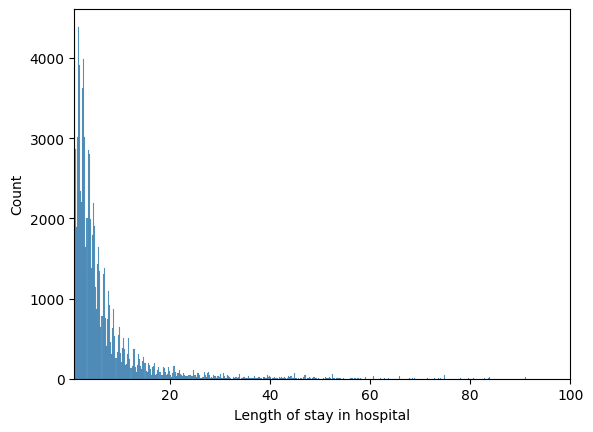

In [ ]:
fig, ax = plt.subplots()
sns.histplot(los, cbar_ax=ax)
ax.set_xlim(1, 100)
plt.xlabel("Length of stay in hospital")
plt.show()

In [ ]:
df_merged_final['los']=los
df_merged_final

,subject_id,hadm_id,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,marital_status,race,...,first_careunit,last_careunit,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs),Inpatient_Flow,los
0,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,8,8,6,2,3,28,...,9,9,7,0,52,2,18.537500,93.104000,0,0.786111
1,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,8,8,6,2,3,28,...,9,9,7,0,52,2,18.537500,93.104000,0,0.786111
2,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,5,2,6,0,3,28,...,9,9,7,0,52,2,18.537500,93.104000,0,1.015278
3,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,5,2,6,0,3,28,...,9,9,7,0,52,2,18.537500,93.104000,0,1.015278
4,10000032,25742920.0,2180-08-05 23:44:00,2180-08-07 17:50:00,5,2,8,0,3,28,...,9,9,7,0,52,2,18.537500,93.104000,0,1.754167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134122,11654378,28760789.0,2203-01-13 04:23:00,2203-01-18 13:00:00,5,2,6,1,0,28,...,9,9,15,0,46,0,32.460377,184.133962,0,5.359028
134123,11654378,29542546.0,2201-03-29 07:15:00,2201-03-29 20:45:00,7,6,6,1,0,28,...,9,9,12,0,46,0,32.460377,184.133962,0,0.562500
134124,11654378,29542546.0,2201-03-29 07:15:00,2201-03-29 20:45:00,7,6,6,1,0,28,...,9,9,12,0,46,0,32.460377,184.133962,0,0.562500
134125,11654378,29893525.0,2199-09-13 21:57:00,2199-09-15 16:45:00,8,8,7,1,0,28,...,9,9,9,0,46,0,32.460377,184.133962,0,1.783333


In [ ]:
percentile_95 = np.percentile(df_merged_final.los, 95)

print("95th percentile:", percentile_95)

95th percentile: 19.64097222222222


In [ ]:
df_merged_final=df_merged_final[df_merged_final['los']<19.6]
df_merged_final

,subject_id,hadm_id,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,marital_status,race,...,first_careunit,last_careunit,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs),Inpatient_Flow,los
0,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,8,8,6,2,3,28,...,9,9,7,0,52,2,18.537500,93.104000,0,0.786111
1,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,8,8,6,2,3,28,...,9,9,7,0,52,2,18.537500,93.104000,0,0.786111
2,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,5,2,6,0,3,28,...,9,9,7,0,52,2,18.537500,93.104000,0,1.015278
3,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,5,2,6,0,3,28,...,9,9,7,0,52,2,18.537500,93.104000,0,1.015278
4,10000032,25742920.0,2180-08-05 23:44:00,2180-08-07 17:50:00,5,2,8,0,3,28,...,9,9,7,0,52,2,18.537500,93.104000,0,1.754167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134122,11654378,28760789.0,2203-01-13 04:23:00,2203-01-18 13:00:00,5,2,6,1,0,28,...,9,9,15,0,46,0,32.460377,184.133962,0,5.359028
134123,11654378,29542546.0,2201-03-29 07:15:00,2201-03-29 20:45:00,7,6,6,1,0,28,...,9,9,12,0,46,0,32.460377,184.133962,0,0.562500
134124,11654378,29542546.0,2201-03-29 07:15:00,2201-03-29 20:45:00,7,6,6,1,0,28,...,9,9,12,0,46,0,32.460377,184.133962,0,0.562500
134125,11654378,29893525.0,2199-09-13 21:57:00,2199-09-15 16:45:00,8,8,7,1,0,28,...,9,9,9,0,46,0,32.460377,184.133962,0,1.783333


In [ ]:
na_df=df_merged_final.isna().sum()
na_df

subject_id                0
hadm_id                   0
admittime                 0
dischtime                 0
admission_type            0
admission_location        0
discharge_location        0
insurance                 0
marital_status            0
race                      0
drg_type                  0
drg_code              13444
first_careunit            0
last_careunit             0
curr_service              0
gender                    0
anchor_age                0
anchor_year_group         0
BMI (kg/m2)               0
Weight (Lbs)              0
Inpatient_Flow            0
los                       0
dtype: int64

In [ ]:
df_merged_final=df_merged_final.dropna(subset=['drg_code'])

In [ ]:
df_merged_final

,subject_id,hadm_id,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,marital_status,race,...,first_careunit,last_careunit,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs),Inpatient_Flow,los
0,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,8,8,6,2,3,28,...,9,9,7,0,52,2,18.537500,93.104000,0,0.786111
1,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,8,8,6,2,3,28,...,9,9,7,0,52,2,18.537500,93.104000,0,0.786111
2,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,5,2,6,0,3,28,...,9,9,7,0,52,2,18.537500,93.104000,0,1.015278
3,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,5,2,6,0,3,28,...,9,9,7,0,52,2,18.537500,93.104000,0,1.015278
4,10000032,25742920.0,2180-08-05 23:44:00,2180-08-07 17:50:00,5,2,8,0,3,28,...,9,9,7,0,52,2,18.537500,93.104000,0,1.754167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134122,11654378,28760789.0,2203-01-13 04:23:00,2203-01-18 13:00:00,5,2,6,1,0,28,...,9,9,15,0,46,0,32.460377,184.133962,0,5.359028
134123,11654378,29542546.0,2201-03-29 07:15:00,2201-03-29 20:45:00,7,6,6,1,0,28,...,9,9,12,0,46,0,32.460377,184.133962,0,0.562500
134124,11654378,29542546.0,2201-03-29 07:15:00,2201-03-29 20:45:00,7,6,6,1,0,28,...,9,9,12,0,46,0,32.460377,184.133962,0,0.562500
134125,11654378,29893525.0,2199-09-13 21:57:00,2199-09-15 16:45:00,8,8,7,1,0,28,...,9,9,9,0,46,0,32.460377,184.133962,0,1.783333


In [ ]:
X=df_merged_final.iloc[:,4:].drop(columns=['Inpatient_Flow', 'los'])
X

,admission_type,admission_location,discharge_location,insurance,marital_status,race,drg_type,drg_code,first_careunit,last_careunit,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs)
0,8,8,6,2,3,28,0,283.0,9,9,7,0,52,2,18.537500,93.104000
1,8,8,6,2,3,28,1,442.0,9,9,7,0,52,2,18.537500,93.104000
2,5,2,6,0,3,28,0,279.0,9,9,7,0,52,2,18.537500,93.104000
3,5,2,6,0,3,28,1,442.0,9,9,7,0,52,2,18.537500,93.104000
4,5,2,8,0,3,28,0,283.0,9,9,7,0,52,2,18.537500,93.104000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134122,5,2,6,1,0,28,1,392.0,9,9,15,0,46,0,32.460377,184.133962
134123,7,6,6,1,0,28,0,310.0,9,9,12,0,46,0,32.460377,184.133962
134124,7,6,6,1,0,28,1,479.0,9,9,12,0,46,0,32.460377,184.133962
134125,8,8,7,1,0,28,0,347.0,9,9,9,0,46,0,32.460377,184.133962


In [ ]:
X['BMI (kg/m2)']=X['BMI (kg/m2)'].astype(float)
X['Weight (Lbs)']=X['Weight (Lbs)'].astype(float)
X

,admission_type,admission_location,discharge_location,insurance,marital_status,race,drg_type,drg_code,first_careunit,last_careunit,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs)
0,8,8,6,2,3,28,0,283.0,9,9,7,0,52,2,18.537500,93.104000
1,8,8,6,2,3,28,1,442.0,9,9,7,0,52,2,18.537500,93.104000
2,5,2,6,0,3,28,0,279.0,9,9,7,0,52,2,18.537500,93.104000
3,5,2,6,0,3,28,1,442.0,9,9,7,0,52,2,18.537500,93.104000
4,5,2,8,0,3,28,0,283.0,9,9,7,0,52,2,18.537500,93.104000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134122,5,2,6,1,0,28,1,392.0,9,9,15,0,46,0,32.460377,184.133962
134123,7,6,6,1,0,28,0,310.0,9,9,12,0,46,0,32.460377,184.133962
134124,7,6,6,1,0,28,1,479.0,9,9,12,0,46,0,32.460377,184.133962
134125,8,8,7,1,0,28,0,347.0,9,9,9,0,46,0,32.460377,184.133962


In [ ]:
nax=X.isna().sum()
nax

admission_type        0
admission_location    0
discharge_location    0
insurance             0
marital_status        0
race                  0
drg_type              0
drg_code              0
first_careunit        0
last_careunit         0
curr_service          0
gender                0
anchor_age            0
anchor_year_group     0
BMI (kg/m2)           0
Weight (Lbs)          0
dtype: int64

In [ ]:
X.iloc[:,:-2]=X.iloc[:,:-2].astype(int)
X

<ipython-input-77-34978e415627>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:,:-2]=X.iloc[:,:-2].astype(int)


,admission_type,admission_location,discharge_location,insurance,marital_status,race,drg_type,drg_code,first_careunit,last_careunit,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs)
0,8,8,6,2,3,28,0,283,9,9,7,0,52,2,18.537500,93.104000
1,8,8,6,2,3,28,1,442,9,9,7,0,52,2,18.537500,93.104000
2,5,2,6,0,3,28,0,279,9,9,7,0,52,2,18.537500,93.104000
3,5,2,6,0,3,28,1,442,9,9,7,0,52,2,18.537500,93.104000
4,5,2,8,0,3,28,0,283,9,9,7,0,52,2,18.537500,93.104000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134122,5,2,6,1,0,28,1,392,9,9,15,0,46,0,32.460377,184.133962
134123,7,6,6,1,0,28,0,310,9,9,12,0,46,0,32.460377,184.133962
134124,7,6,6,1,0,28,1,479,9,9,12,0,46,0,32.460377,184.133962
134125,8,8,7,1,0,28,0,347,9,9,9,0,46,0,32.460377,184.133962


<Axes: >

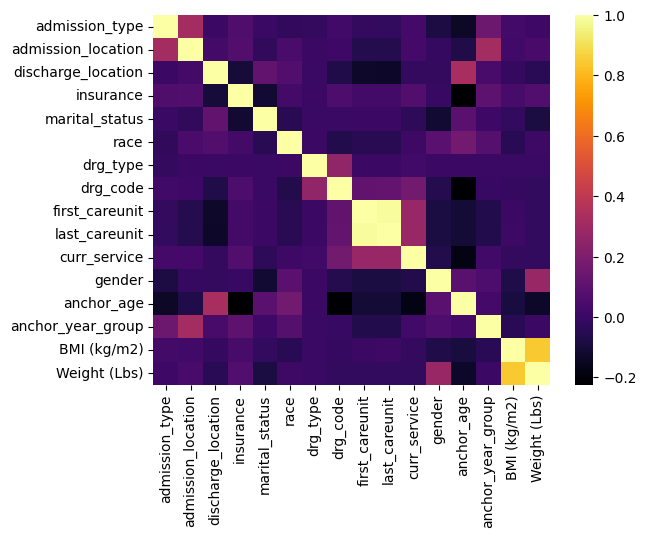

In [ ]:
sns.heatmap(X.corr(), cmap='inferno')

In [ ]:
X=X.drop(columns=['Weight (Lbs)', 'last_careunit'])
X

,admission_type,admission_location,discharge_location,insurance,marital_status,race,drg_type,drg_code,first_careunit,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2)
0,8,8,6,2,3,28,0,283,9,7,0,52,2,18.537500
1,8,8,6,2,3,28,1,442,9,7,0,52,2,18.537500
2,5,2,6,0,3,28,0,279,9,7,0,52,2,18.537500
3,5,2,6,0,3,28,1,442,9,7,0,52,2,18.537500
4,5,2,8,0,3,28,0,283,9,7,0,52,2,18.537500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134122,5,2,6,1,0,28,1,392,9,15,0,46,0,32.460377
134123,7,6,6,1,0,28,0,310,9,12,0,46,0,32.460377
134124,7,6,6,1,0,28,1,479,9,12,0,46,0,32.460377
134125,8,8,7,1,0,28,0,347,9,9,0,46,0,32.460377


In [ ]:
df_description = X.describe()

# Print the summary
subset_statistics = df_description.loc[['mean', 'min', 'max', 'std']]  # Selecting rows for 'mean', 'std', and '50%'
print(subset_statistics)

      admission_type  admission_location  discharge_location  insurance  \
mean        5.539293            4.393310            7.216455   1.444554   
min         0.000000            0.000000            0.000000   0.000000   
max         8.000000           10.000000           13.000000   2.000000   
std         1.665170            2.590591            2.326963   0.630383   

      marital_status       race  drg_type    drg_code  first_careunit  \
mean        1.523011  22.932264  0.516237  410.985007        7.939950   
min         0.000000   0.000000  0.000000    1.000000        0.000000   
max         4.000000  32.000000  1.000000  998.000000        9.000000   
std         0.855383   8.896996  0.499740  255.784497        2.530327   

      curr_service    gender  anchor_age  anchor_year_group  BMI (kg/m2)  
mean      8.447368  0.457880   58.966184           1.076281    28.414271  
min       0.000000  0.000000   18.000000           0.000000     2.300000  
max      18.000000  1.000000   91

In [ ]:
y1=df_merged_final['Inpatient_Flow']
y2=df_merged_final['los']

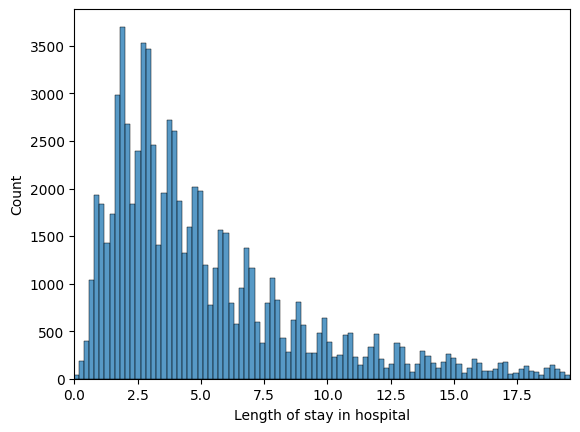

In [ ]:
fig, ax = plt.subplots()
sns.histplot(y2, cbar_ax=ax)
ax.set_xlim(0,19.6)
plt.xlabel("Length of stay in hospital")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=1502)

X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=1502)

In [ ]:
X_train

,admission_type,admission_location,discharge_location,insurance,marital_status,race,drg_type,drg_code,last_careunit,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2)
8314,5,2,6,2,2,28,0,383,9,7,1,28,0,27.476923
1438,7,6,6,2,1,28,0,403,9,15,0,32,1,40.337037
8264,6,6,7,2,0,28,1,853,3,15,0,63,3,20.877778
82412,6,8,12,2,3,28,1,551,9,7,0,86,3,25.000000
27876,5,2,6,0,1,22,0,254,2,7,0,53,2,21.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44330,1,6,12,1,1,28,0,950,9,15,0,77,2,27.166667
130571,6,2,6,2,2,7,1,66,9,8,0,54,1,37.100000
72464,6,2,6,1,2,28,1,166,3,11,1,25,0,25.901992
37797,7,6,6,2,0,28,0,175,9,0,0,42,0,34.500000


In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, f1_score

In [ ]:
num_samples = 61415
input_dim = 14

# Define the multi-task neural network model with shared layers and task-specific layers
def create_multi_task_model(input_dim):
    input_layer = tf.keras.layers.Input(shape=(input_dim,))
    shared_layer1 = tf.keras.layers.Dense(14, activation='relu')(input_layer)

    # Task 1-specific layer (Binary Classification)
    class_specific_layer = tf.keras.layers.Dense(5, activation='relu')(shared_layer1)
    class_output = tf.keras.layers.Dense(1, activation='sigmoid', name='class_output')(class_specific_layer)

    # Task 2-specific layer (Regression)
    reg_specific_layer = tf.keras.layers.Dense(14, activation='relu')(shared_layer1)
    reg_output = tf.keras.layers.Dense(1, activation='relu', name='reg_output')(reg_specific_layer)

    model = tf.keras.models.Model(inputs=input_layer, outputs=[class_output, reg_output])

    return model

# Create the multi-task model
model = create_multi_task_model(input_dim)

# Compile the model with appropriate loss functions for each task
model.compile(optimizer='adam',
              loss=['binary_crossentropy', 'mean_squared_error'],
              metrics={'class_output': 'accuracy', 'reg_output': 'mae'})

# Train the multi-task model
model.fit(X_train,
        {'class_output': y1_train, 'reg_output': y2_train},
        epochs=20, batch_size=30)

# Make predictions on the test data
class_predictions, reg_predictions = model.predict(X_test)

# Evaluate the model's performance on each task
class_accuracy = accuracy_score(y1_test, np.round(class_predictions).flatten())
class_f1_score = f1_score(y1_test, np.round(class_predictions).flatten())
reg_mae = mean_absolute_error(y2_test, reg_predictions.flatten())
reg_rmse=np.sqrt(mean_squared_error(y2_test, reg_predictions.flatten()))

print("Classification Accuracy:", class_accuracy)
print("Regression Mean Absolute Error:", reg_mae)
print("Regression Root Mean  Squared Error:", reg_rmse)

Epoch 1/20
2048/2048 [==============================] - 9s 3ms/step - loss: 15.2098 - class_output_loss: 0.5748 - reg_output_loss: 14.6349 - class_output_accuracy: 0.7942 - reg_output_mae: 2.8479
Epoch 2/20
2048/2048 [==============================] - 7s 3ms/step - loss: 13.1959 - class_output_loss: 0.4697 - reg_output_loss: 12.7261 - class_output_accuracy: 0.8198 - reg_output_mae: 2.6478
Epoch 3/20
2048/2048 [==============================] - 5s 2ms/step - loss: 13.0557 - class_output_loss: 0.4652 - reg_output_loss: 12.5906 - class_output_accuracy: 0.8210 - reg_output_mae: 2.6386
Epoch 4/20
2048/2048 [==============================] - 5s 2ms/step - loss: 13.0346 - class_output_loss: 0.4635 - reg_output_loss: 12.5711 - class_output_accuracy: 0.8225 - reg_output_mae: 2.6364
Epoch 5/20
2048/2048 [==============================] - 6s 3ms/step - loss: 12.9567 - class_output_loss: 0.4608 - reg_output_loss: 12.4959 - class_output_accuracy: 0.8236 - reg_output_mae: 2.6272
Epoch 6/20
2048/2048

Single task regression models

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()

# Train the model on the training data
linear_regressor.fit(X_train, y2_train)

# Make predictions on the test data
y2_pred_lr = linear_regressor.predict(X_test)

lr_score_MAE = mean_absolute_error(y2_test, y2_pred_lr)
lr_score_RMSE = np.sqrt(mean_squared_error(y2_test, y2_pred_lr))
print(f'MAE Score on Test set: {lr_score_MAE:0.2f}')
print(f'RMSE Score on Test set: {lr_score_RMSE:0.2f}')

MAE Score on Test set: 2.60
RMSE Score on Test set: 3.48


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(14, activation='relu', input_shape=(14,)),
    layers.Dense(5, activation='relu'),
    layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics='mae')

# Train the model
model.fit(X_train, y2_train, epochs=20, batch_size=70, verbose=100)

y2_pred = model.predict(X_test)
nn_score_MAE = mean_absolute_error(y2_test, y2_pred)
nn_score_RMSE = np.sqrt(mean_squared_error(y2_test, y2_pred))
print(f'MAE Score on Test set: {nn_score_MAE:0.2f}')
print(f'RMSE Score on Test set: {nn_score_RMSE:0.2f}')

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
480/480 [==============================] - 1s 1ms/step
MAE Score on Test set: 2.56
RMSE Score on Test set: 3.46


<Figure size 600x600 with 0 Axes>

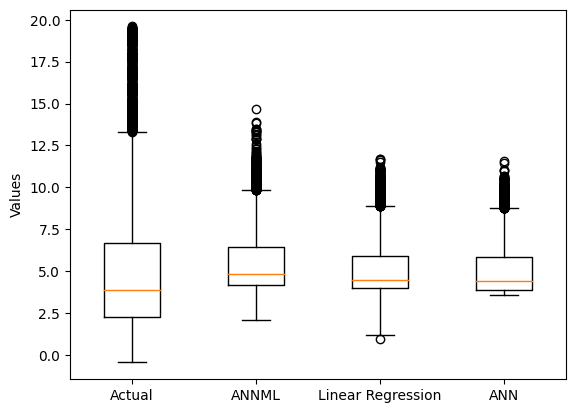

In [ ]:
# Combine the data into a list for plotting
data_to_plot = data_to_plot = np.column_stack((y2_test, reg_predictions, y2_pred_lr, y2_pred))
plt.figure(figsize=(6,6))

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the multiple boxplots
ax.boxplot(data_to_plot)

# Customize the plot (optional)
ax.set_xticklabels(['Actual', 'ANNML', 'Linear Regression', 'ANN'])
ax.set_ylabel('Values')

# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the ANN model
model = Sequential()
model.add(Dense(5, input_dim=14, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y1_train, epochs=10, batch_size=70, validation_data=(X_test, y1_test))

# Make predictions on the test data
y1_pred = model.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y1_test, np.round(y1_pred).flatten())
print(f"Accuracy: {accuracy:.2f}")

Epoch 1/10
878/878 [==============================] - 3s 2ms/step - loss: 0.0730 - accuracy: 0.9732 - val_loss: 0.0046 - val_accuracy: 0.9999
Epoch 2/10
878/878 [==============================] - 2s 2ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 7.8437e-04 - val_accuracy: 1.0000
Epoch 3/10
878/878 [==============================] - 3s 3ms/step - loss: 4.7240e-04 - accuracy: 1.0000 - val_loss: 2.8798e-04 - val_accuracy: 1.0000
Epoch 4/10
878/878 [==============================] - 2s 3ms/step - loss: 1.9147e-04 - accuracy: 1.0000 - val_loss: 1.3249e-04 - val_accuracy: 1.0000
Epoch 5/10
878/878 [==============================] - 2s 2ms/step - loss: 9.3404e-05 - accuracy: 1.0000 - val_loss: 6.7811e-05 - val_accuracy: 1.0000
Epoch 6/10
878/878 [==============================] - 2s 2ms/step - loss: 5.0011e-05 - accuracy: 1.0000 - val_loss: 3.7272e-05 - val_accuracy: 1.0000
Epoch 7/10
878/878 [==============================] - 2s 2ms/step - loss: 2.8103e-05 - accuracy: 1.0000 - val_lo

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the SVM classifier
svm_classifier = SVC(kernel='linear')  # 'linear' kernel for linear SVM

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y1_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y1_test, y_pred)
print("Accuracy:", accuracy)

# Other metrics and evaluation
print("Classification Report:")
print(classification_report(y1_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y1_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12515
           1       1.00      1.00      1.00      2839

    accuracy                           1.00     15354
   macro avg       1.00      1.00      1.00     15354
weighted avg       1.00      1.00      1.00     15354

Confusion Matrix:
[[12515     0]
 [    0  2839]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y1_train)

# Make predictions on the test set
y_pred_log = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y1_test, y_pred_log)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
